# **Project Idea**

TikTok is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

# **Build a Logistic Regression model**
- In this project, a logistic regression model is built to estimate the probability of an outcome.
- This project has three parts: 
    **Part 1:** EDA & Checking Model Assumptions 
    **Part 2:** Model Building and Evaluation 
    **Part 3:** Interpreting Model Results

### **Task 1. Imports and loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv", index_col=0)  # Use index_col to avoid the creation of an "Unnamed: 0" column

### Task 2a. Explore data with EDA
Analyze the data and check for and handle missing values and duplicates.

In [6]:
# Display basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19382 entries, 1 to 19382
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_id                  19382 non-null  int64  
 2   video_duration_sec        19382 non-null  int64  
 3   video_transcription_text  19084 non-null  object 
 4   verified_status           19382 non-null  object 
 5   author_ban_status         19382 non-null  object 
 6   video_view_count          19084 non-null  float64
 7   video_like_count          19084 non-null  float64
 8   video_share_count         19084 non-null  float64
 9   video_download_count      19084 non-null  float64
 10  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.8+ MB


In [7]:
# Get data types of columns
data.dtypes

claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [8]:
# Check for duplicates using .drop_duplicates()
print('Shape of dataframe:', data.shape)
print('Shape of dataframe with duplicates dropped:', data.drop_duplicates().shape)

# Check for missing values in dataframe using .isna()
print('Missing values per column:')
print(data.isna().sum())
print('Total count of missing values:', data.isna().sum().sum())

Shape of dataframe: (19382, 11)
Shape of dataframe with duplicates dropped: (19382, 11)
Missing values per column:
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64
Total count of missing values: 2086


In [9]:
# Drop rows with missing values
data.dropna(inplace=True)

In [10]:
# Generate basic descriptive stats
data.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### Task 2b. Check for and Handle Outliers

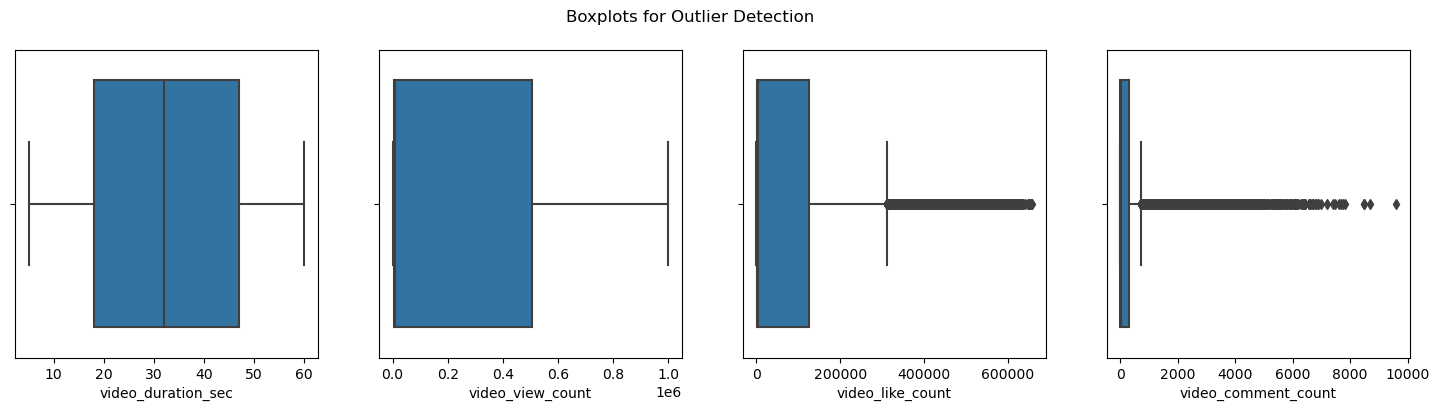

In [11]:
# Create a figure with three subplots for each feature
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
fig.suptitle('Boxplots for Outlier Detection')
sns.boxplot(ax=axes[0], x=data['video_duration_sec'])
sns.boxplot(ax=axes[1], x=data['video_view_count'])
sns.boxplot(ax=axes[2], x=data['video_like_count'])
sns.boxplot(ax=axes[3], x=data['video_comment_count'])
plt.show()

In [12]:
# Handle outliers for video_like_count
q1 = data["video_like_count"].quantile(0.25)
q3 = data["video_like_count"].quantile(0.75)

iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

print('Q3:', q3, ', upper_limit:', upper_limit)

data.loc[data["video_like_count"] > upper_limit, 'video_like_count'] = upper_limit

Q3: 125020.0 , upper_limit: 311333.875


In [13]:
# Check for and handle outliers for video_comment_count
q1 = data["video_comment_count"].quantile(0.25)
q3 = data["video_comment_count"].quantile(0.75)

iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

print('Q3:', q3, ', upper_limit:', upper_limit)

data.loc[data["video_comment_count"] > upper_limit, 'video_comment_count'] = upper_limit

Q3: 292.0 , upper_limit: 728.5


### Task 2c. Check for and Handle Class Balance

In [14]:
# Check class balance for video_comment_count
data["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

**Insight**
- Approximately 94% of the dataset represents videos posted by unverified accounts and 6.0% represents videos posted by verified accounts. So the outcome variable is not very balanced.
- Use resampling to create class balance in the outcome variable

In [15]:
# Identify data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                   replace=True,                 # to sample with replacement
                                   n_samples=len(data_majority), # to match majority class
                                   random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

### Task 3d. Feature Engineering

#### Create `video_transcription_text_length` Column
In this step, create a column called `video_transcription_text_length` that captures the length for each transcription text

In [16]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["video_transcription_text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

# Display first few rows of dataframe after adding new column
data_upsampled.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

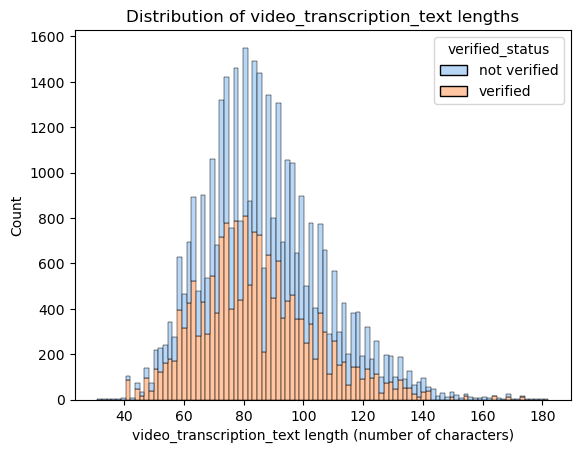

In [17]:
# Visualize the distribution of `video_transcription_text` length for videos posted by: 
            # 1. Verified accounts 
            # 2. Unverified accounts

# Create two histograms representing verified and unverified accounts in one plot
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="video_transcription_text_length", kde=False, palette="pastel", hue="verified_status", element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text lengths")
plt.show()

### Task 2e. Identify Correlations

In [18]:
# Code a correlation matrix containing pairwise correlation of columns to help determine most correlated features
data_upsampled.corr()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
video_id,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
video_transcription_text_length,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


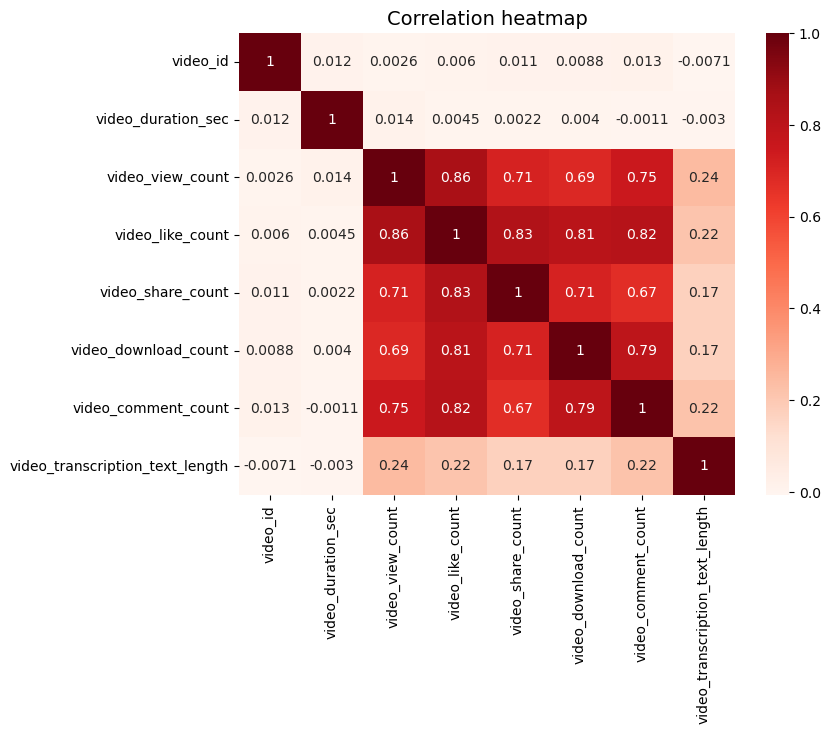

In [19]:
# Create a heatmap to visualize how correlated features are by plugging data_upsampled.corr() in as a parameter
plt.figure(figsize=(8, 6))
sns.heatmap(data_upsampled.corr(), annot=True, cmap='Reds')
plt.title("Correlation heatmap", fontsize=14)
plt.show()

**Insight**
- Since one of the model assumptions for logistic regression is no severe multicollinearity among the features, one of the fearures video_view_count and video_like_count variables could be excluded as they are strongly correlated (0.85 correlation coefficient)
- To build a logistic regression model that meets this assumption, we could exclude the video_like_count feature and keep other features that quantify video metrics

### Task 3a. Split Data Into Outcome and Predictor Features

In [20]:
# Remove the target and unwanted columns from the features
X = data_upsampled.drop(columns=['verified_status', 'video_id', 'video_like_count', 'video_transcription_text', 'video_transcription_text_length'])

# Set y (target) feature
y = data_upsampled[['verified_status']]

X.head()

,claim_status,video_duration_sec,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,claim,59,under review,343296.0,241.0,1.0,0.0
1,claim,32,active,140877.0,19034.0,1161.0,684.0
2,claim,31,active,902185.0,2858.0,833.0,329.0
3,claim,25,active,437506.0,34812.0,1234.0,584.0
4,claim,19,active,56167.0,4110.0,547.0,152.0


### Task 3b. Pre-process the Data
In order to work with the implementations of models through sklearn, all categorical features will need to be made numeric. One way to do this is through `one-hot encoding` or `pd.get_dummies()`

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Get shape of each training and testing set to confirm that the dimensions are in alignment
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826, 1), (8942, 1))

#### Task 3b.1 Encode Variables in The Training Sets X and y

In [22]:
# Explore data types of the training set
print(X.dtypes)
print(y.dtypes)

claim_status             object
video_duration_sec        int64
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object
verified_status    object
dtype: object


**Insight**
- The `claim_status` and `author_ban_status` features in X set and `verified_status` feature in y set need to be encoded. 

In [23]:
# Set up an encoder for one-hot encoding the categorical predictor features 
X_encoder = OneHotEncoder(drop='first', sparse=False)

In [24]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

In [25]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [26]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [27]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())
X_train_encoded_df.rename(columns={'x1_under review': 'x1_under_review'}, inplace=True)

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [28]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Use `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [34]:
# Set up an encoder for one-hot encoding the categorical outcome feature
y_encoder = OneHotEncoder(drop='first', sparse=False)

In [35]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### Task 3c. Model Building

In [36]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

### Taks 4a. Results and Evaluation

#### Task 4a.1 Encode Variables in The Testing Sets X and y

In [37]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

In [38]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

In [40]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())
X_test_encoded_df.rename(columns={'x1_under review': 'x1_under_review'}, inplace=True)

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [41]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [45]:
# Encode the true labels of the testing set y_test so it can be compared to the predictions.
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

#### Task 4a.2 Test the Logistic Regression Model

In [46]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

# Display the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [47]:
# Get shape of each training and testing set to confirm again that they are in alignment
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

### Task 4b. Visualize Model Results
Create a confusion matrix to visualize the results of the logistic regression model.

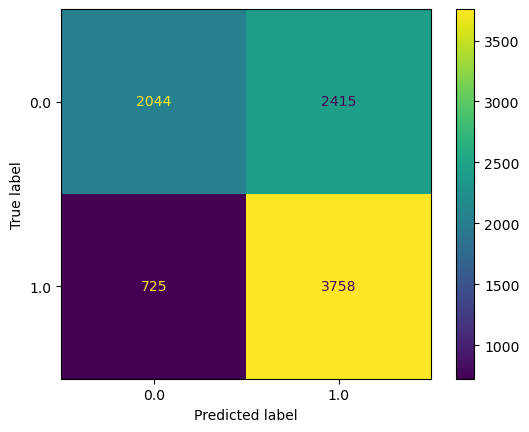

In [48]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

**Insights:**
- The upper-left quadrant displays the number of videos posted by unverified accounts that the model accurately classified as so.

- The upper-right quadrant displays the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

- The lower-left quadrant displays the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

- The lower-right quadrant displays the number of videos posted by verified accounts that the model accurately classified as so.

**Note:** A perfect model would yield all true negatives and true positives (upper left and lower right quadrants), and no false negatives or false positives.

In [49]:
# Create a classification report includes precision, recall, f1-score, and accuracy metrics to evaluate the performance
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



### Task 4c. Interpret Model Coefficients

In [50]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
pd.DataFrame(data={"Feature Name":X_train_final.columns, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.607893e-03
1,video_view_count,-2.132079e-06
2,video_share_count,5.930971e-06
3,video_download_count,-1.099775e-05
4,video_comment_count,-6.404235e-04
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


### Task 4d. Key Takeaways

1. The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop video_like_count from the model building.

2. Based on the logistic regression model, each additional second of the video is associated with 0.01 increase in the log-odds of the user having a verified status.

3. The logistic regression model had decent predictive power: a precision of 69% and a recall of 66% (weighted averages), and it achieved an accuracy of 66%.